In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Lectura del dataset

In [29]:
ds = pd.read_csv('breast_cancer.csv')

In [30]:
ds.head(5)

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


### Separación de variables de entrenamiento y prueba

In [31]:
X = ds.iloc[:, 0:9].values
y = ds.iloc[:, 9].values

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/steve/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Entrenando el modelo

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Inicializar la Red neuronal

In [37]:
classifier = Sequential()

In [38]:
# Capa de entrada y conexion con la segunda capa
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 9))


In [39]:
# Segunda capa y conexion con la última capa
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

In [40]:
# Última capa
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

In [41]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
history = classifier.fit(X_train, y_train,  batch_size = 100, epochs = 300,validation_data=(X_test,y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/300
398/398 [==============================] - 0s 1ms/step - loss: 0.6930 - acc: 0.5302 - val_loss: 0.6927 - val_acc: 0.6257
Epoch 2/300
398/398 [==============================] - 0s 36us/step - loss: 0.6924 - acc: 0.6382 - val_loss: 0.6921 - val_acc: 0.6257
Epoch 3/300
398/398 [==============================] - 0s 50us/step - loss: 0.6919 - acc: 0.6382 - val_loss: 0.6916 - val_acc: 0.6257
Epoch 4/300
398/398 [==============================] - 0s 55us/step - loss: 0.6912 - acc: 0.6382 - val_loss: 0.6910 - val_acc: 0.6257
Epoch 5/300
398/398 [==============================] - 0s 45us/step - loss: 0.6905 - acc: 0.6382 - val_loss: 0.6903 - val_acc: 0.6257
Epoch 6/300
398/398 [==============================] - 0s 39us/step - loss: 0.6898 - acc: 0.6382 - val_loss: 0.6895 - val_acc: 0.6257
Epoch 7/300
398/398 [==============================] - 0s 49us/step - loss: 0.6889 - acc: 0.6382 - val_loss: 0.6886 - val_acc: 0.6257
Epoch 8/300
398/3

398/398 [==============================] - 0s 31us/step - loss: 0.1971 - acc: 0.9523 - val_loss: 0.1965 - val_acc: 0.9591
Epoch 62/300
398/398 [==============================] - 0s 23us/step - loss: 0.1915 - acc: 0.9523 - val_loss: 0.1913 - val_acc: 0.9591
Epoch 63/300
398/398 [==============================] - 0s 37us/step - loss: 0.1862 - acc: 0.9523 - val_loss: 0.1864 - val_acc: 0.9591
Epoch 64/300
398/398 [==============================] - 0s 36us/step - loss: 0.1815 - acc: 0.9523 - val_loss: 0.1818 - val_acc: 0.9591
Epoch 65/300
398/398 [==============================] - 0s 36us/step - loss: 0.1769 - acc: 0.9523 - val_loss: 0.1775 - val_acc: 0.9591
Epoch 66/300
398/398 [==============================] - 0s 32us/step - loss: 0.1726 - acc: 0.9523 - val_loss: 0.1735 - val_acc: 0.9591
Epoch 67/300
398/398 [==============================] - 0s 29us/step - loss: 0.1685 - acc: 0.9523 - val_loss: 0.1697 - val_acc: 0.9591
Epoch 68/300
398/398 [==============================] - 0s 33us/step

398/398 [==============================] - 0s 34us/step - loss: 0.1035 - acc: 0.9673 - val_loss: 0.1063 - val_acc: 0.9649
Epoch 122/300
398/398 [==============================] - 0s 37us/step - loss: 0.1032 - acc: 0.9673 - val_loss: 0.1060 - val_acc: 0.9649
Epoch 123/300
398/398 [==============================] - 0s 39us/step - loss: 0.1030 - acc: 0.9673 - val_loss: 0.1058 - val_acc: 0.9649
Epoch 124/300
398/398 [==============================] - 0s 29us/step - loss: 0.1027 - acc: 0.9673 - val_loss: 0.1055 - val_acc: 0.9649
Epoch 125/300
398/398 [==============================] - 0s 34us/step - loss: 0.1024 - acc: 0.9673 - val_loss: 0.1053 - val_acc: 0.9649
Epoch 126/300
398/398 [==============================] - 0s 42us/step - loss: 0.1023 - acc: 0.9673 - val_loss: 0.1050 - val_acc: 0.9649
Epoch 127/300
398/398 [==============================] - 0s 35us/step - loss: 0.1020 - acc: 0.9673 - val_loss: 0.1047 - val_acc: 0.9649
Epoch 128/300
398/398 [==============================] - 0s 34

398/398 [==============================] - 0s 33us/step - loss: 0.0947 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 182/300
398/398 [==============================] - 0s 37us/step - loss: 0.0946 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 183/300
398/398 [==============================] - 0s 49us/step - loss: 0.0946 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 184/300
398/398 [==============================] - 0s 42us/step - loss: 0.0945 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 185/300
398/398 [==============================] - 0s 34us/step - loss: 0.0945 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 186/300
398/398 [==============================] - 0s 33us/step - loss: 0.0944 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 187/300
398/398 [==============================] - 0s 34us/step - loss: 0.0943 - acc: 0.9724 - val_loss: 0.0992 - val_acc: 0.9532
Epoch 188/300
398/398 [==============================] - 0s 53

398/398 [==============================] - 0s 35us/step - loss: 0.0919 - acc: 0.9749 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 242/300
398/398 [==============================] - 0s 83us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 243/300
398/398 [==============================] - 0s 41us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 244/300
398/398 [==============================] - 0s 35us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 245/300
398/398 [==============================] - 0s 35us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 246/300
398/398 [==============================] - 0s 31us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 0.1010 - val_acc: 0.9532
Epoch 247/300
398/398 [==============================] - 0s 35us/step - loss: 0.0918 - acc: 0.9749 - val_loss: 0.1011 - val_acc: 0.9532
Epoch 248/300
398/398 [==============================] - 0s 36

### Evaluación del modelo

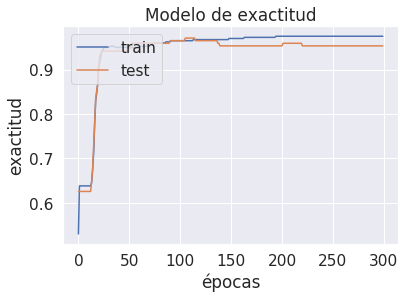

In [54]:
# Modelo de exactitud
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modelo de exactitud')
plt.ylabel('exactitud')
plt.xlabel('épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

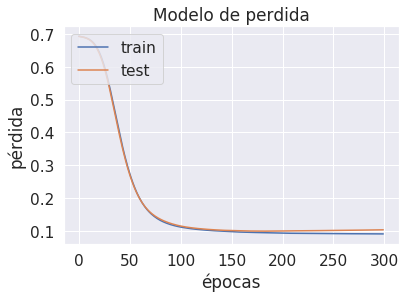

In [55]:
#  summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de perdida')
plt.ylabel('pérdida')
plt.xlabel('épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
y_pred  = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[103,   4],
       [  4,  60]])

In [47]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.94      0.94      0.94        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



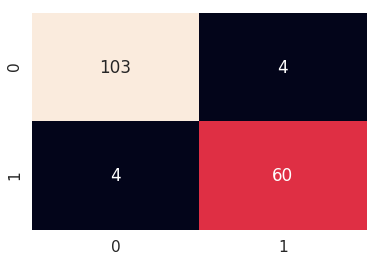

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
arregloMC = confusion_matrix(y_test,y_pred)
sns.set(font_scale=1.4)
sns.heatmap(arregloMC, annot=True, fmt='g', cbar=False)

$$ Exactitud = \frac{TP + TN}{\sum Población\;total}$$

In [49]:
print("La exactitud es: {}%".format(((cm[0][0] + cm[1][1])/171)*100))

La exactitud es: 95.32163742690058%
